데이터구성

라이브러리로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
 

데이터셋로드

In [4]:
df = pd.read_csv("data/diabetes.csv")
df.shape
 

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


학습,예측 데이터셋 나누기

In [6]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [7]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [8]:
test = df[split_count:].copy()
train.shape

(614, 9)

학습,예측에 사용할 컬럼

In [9]:
#feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

정답값이자 예측해야될값

In [10]:
#label_name이라는 변수에 예측할 컬럼의 이름을 담음
label_name = train.columns[-1]
label_name

'Outcome'

학습,예측 데이터셋만들기

In [11]:
#학습 세트 만들기

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
#정답 값 만들기
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [18]:
#예측에 사용할 데이터세트 만들기
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [19]:
#예측의 정답값
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

머신러닝 알고리즘 가져오기 (의사결정나무)

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

학습(훈련)

In [21]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

예측

In [25]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

알고리즘 분석

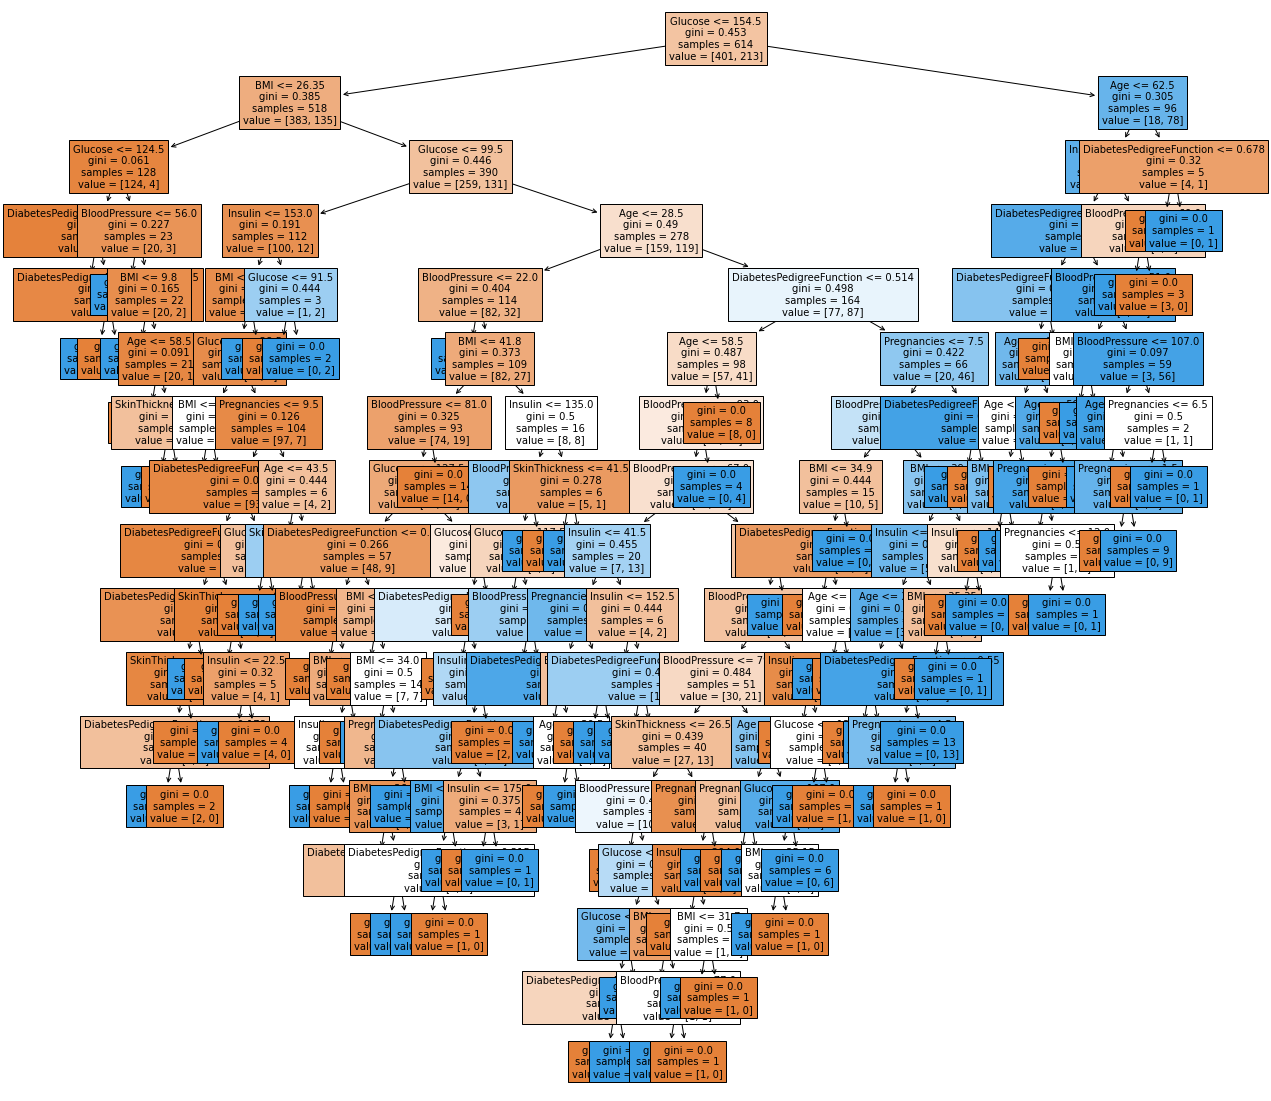

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names,
                filled=True, fontsize=10)

In [30]:
model.feature_importances_

array([0.06922465, 0.29698219, 0.12043203, 0.03155557, 0.08882193,
       0.16703353, 0.12573095, 0.10021915])

<AxesSubplot:>

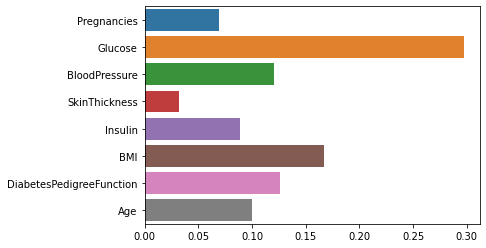

In [31]:
sns.barplot(x=model.feature_importances_, y=feature_names)
 

정확도 측정

In [32]:
diff_count = abs(y_test - y_predict).sum()
diff_count

40

In [33]:
abs(y_test - y_predict).sum() / len(y_test)

0.2597402597402597

In [34]:
(len(y_test) - diff_count) / len(y_test) * 100

74.02597402597402

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) *100

74.02597402597402

In [37]:
model.score(X_test, y_test) * 100

74.02597402597402